# Fruits360 - ResNet18

In [ ]:
# set this flag to True when you run this Notebook on Google Collaboratory
USE_COLAB = True

import os

#@see: https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q
if USE_COLAB:
    # Load the Drive helper and mount
    from google.colab import drive

    # We mount our Google Drive to this foloder - following line will prompt for authorization.
    gdrive_mount_point = '/content/drive/'
    drive.mount(gdrive_mount_point)
    grive_path = os.path.join(gdrive_mount_point, "My Drive/")
    print('Your Google Drive is mounted at ', grive_path)
    COLAB_NOTEBOOKS_PATH = os.path.join(grive_path, "Colab Notebooks/")
    PYTORCH_COLAB_NOTEBOOKS_PATH = os.path.join(COLAB_NOTEBOOKS_PATH, 'pytorch')

    if os.path.exists(PYTORCH_COLAB_NOTEBOOKS_PATH):
        print('You Pytorch Colab notebooks are available at ', PYTORCH_COLAB_NOTEBOOKS_PATH)

        # display list of files
        #!ls '/content/drive/My Drive/Colab Notebooks/'

        # append our Google Drive folder to module search
        # **NOTE:** comment this line out if you are NOT running this notebook on Google Colab
        import sys
        #sys.path.append("/content/drive/My Drive/Colab Notebooks/")
        sys.path.append(PYTORCH_COLAB_NOTEBOOKS_PATH)
        print('NOTE: {} is appended to sys.path!'.format(PYTORCH_COLAB_NOTEBOOKS_PATH))
        # and test it
        # import pytorch_toolkit as pytk
        MODEL_SAVE_DIR = os.path.join(PYTORCH_COLAB_NOTEBOOKS_PATH, 'model_states')
        IMAGES_ZIP_DIR = "/content/drive/My Drive/Colab Notebooks/data/kaggle/fruits360"
    else:
        raise IOError("Unable to mount Google Drive!")
else:
    MODEL_SAVE_DIR = os.path.join('.','model_states')
    IMAGES_ZIP_DIR = "./images/pytorch/fruits360"

if not os.path.exists(MODEL_SAVE_DIR):
    os.mkdir(MODEL_SAVE_DIR)

Mounted at /content/drive/
Your Google Drive is mounted at  /content/drive/My Drive/
You Pytorch Colab notebooks are available at  /content/drive/My Drive/Colab Notebooks/pytorch
NOTE: /content/drive/My Drive/Colab Notebooks/pytorch is appended to sys.path!


# Downloading the Dataset from Kaggle
You can download datasets directly from Kaggle into a Colab environment by running the following steps:
* Login to your Kaggle account and _create a new API Token_ from your profile page (click the `Create API Token` button and download the `kaggle.json` file locally i.e. to your disk.
* Upload the `kaggle.json` that you downloaded to Colab  and move the file to `~/.kaggle/kaggle.json`
* Install Python packages `kaggle` and `kaggle-cli` that needed to access Kaggle programatically. These can be installed using `pip`
* Now you can access datasets on Kaggle
    * Run `!kaggle datasets list` shell command to list all available datasets (may no be such a useful command!)
    * Run `!datasets list -s <<dataset_name>>` to search for a dataset (e.g. for the Malaria dataset, I used `kaggle list -s malaria`)
    * Copy dataset locally using `!kaggle datasets download -d <<full_path_of_dataset>> -p <<target_folder_path>>`

Run the following cells to download the [Fruits360 dataset](https://www.kaggle.com/moltean/fruits) from Kaggle to your Colab environment.

In [ ]:
# assuming you downloaded kaggle.json file to your desktop, run this cell to upload that file to Colab
# this sometimes causes problems, especially if I am behind a firewalls and uploads are jammed!
# This command will display a "upload file" prompt - select the kaggle.json file from your disk & upload

# Uncomment following 2 lines to upload local kaggle.json file to Colab - the file will be uploaded to
# the folder on your Google drive from where you will this this workbook.
# from google.colab import files
# files.upload()

In [ ]:
# so I uploaded my kaggle.json to my Google drive, which I can easily copy into Colab workspace :)
!ls -al "/content/drive/My Drive/Colab Notebooks/kaggle.json"

-rw------- 1 root root 66 Apr  5 21:46 '/content/drive/My Drive/Colab Notebooks/kaggle.json'


In [ ]:
# Run this cell to copy the uploaded kaggle.json file to ~/.kaggle/kaggle.json
# Kaggle expects the token file to be located here!!
!mkdir -p ~/.kaggle
!cp "/content/drive/My Drive/Colab Notebooks/kaggle.json" ~/.kaggle/
# give "me" full access to kaggle.json (i.e. read/write & execute)
!chmod 600 ~/.kaggle/kaggle.json
# confirm that ~/.kaggle folder has kaggle.json file
!ls ~/.kaggle

kaggle.json


In [ ]:
# install Python packages require to access Kaggle datasets
!pip install -q kaggle
!pip install -q kaggle-cli

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 63.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 kB 22.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for lxml
ERROR: Could not build wheels for lxml, which is required to install pyproject.toml-based projects


In [ ]:
# Vola! You now have access to Kaggle datasets

# to list **all** the datasets available on Kaggle, run the following shell command
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          19493        391  0.9411765        
sahirmaharajj/electric-vehicle-population-size-2024         Electric Vehicle Population by Country (2024)  275KB  2024-03-30 19:16:06           1217         35  1.0              
aryanverma99/grocery-prices-data-explore-shopping-trends    Grocery Prices Data: Explore Shopping Trends    28KB  2024-04-02 07:04:33            814         23  1.0              
mexwell/drug-consumption-classification                     💊 Drug Consumption Classification            

In [ ]:
# We can look for a specific dataset (e.g. the fruits dataset) like this
# Search Command is: kaggle datasets list -s complete_or_part_name_of_dataset

!kaggle datasets list -s fruits  # I don't know the exact name, so I used a part-name - fruits

ref                                                              title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
moltean/fruits                                                   Fruits-360                                         1GB  2021-09-12 19:19:48         138810       2862  0.875            
aelchimminut/fruits262                                           Fruits-262                                         6GB  2021-12-15 19:16:59           4993        131  0.875            
marquis03/fruits-100                                             Fruits 100                                       627MB  2023-10-27 12:14:44           1992         36  1.0              
shreyapmaher/fruits-dataset-images                               Fruit

The first one is the one we are looking for. Let's download the zip file to our `/tmp` folder - **this completes the download of data from Kaggle**

In [ ]:
# download command: kaggle datasets download -d <<file_name>> -p <<dest>>

!kaggle datasets download -d moltean/fruits -p /tmp
!ls /tmp

100% 1.28G/1.28G [00:59<00:00, 24.5MB/s]
100% 1.28G/1.28G [00:59<00:00, 23.2MB/s]
dap_multiplexer.5153453fcac1.root.log.INFO.20240406-025612.136
dap_multiplexer.INFO
debugger_5wn6ppov2
directoryprefetcher_binary.5153453fcac1.root.log.INFO.20240406-030206.1933
directoryprefetcher_binary.INFO
drive.5153453fcac1.root.log.ERROR.20240406-030153.1711
drive.5153453fcac1.root.log.ERROR.20240406-030202.1841
drive.5153453fcac1.root.log.INFO.20240406-030151.1708
drive.5153453fcac1.root.log.INFO.20240406-030151.1711
drive.5153453fcac1.root.log.INFO.20240406-030202.1708
drive.5153453fcac1.root.log.INFO.20240406-030202.1841
drive.5153453fcac1.root.log.WARNING.20240406-030153.1711
drive.5153453fcac1.root.log.WARNING.20240406-030202.1841
drive.ERROR
drivefs_ipc.0
drivefs_ipc.0_shell
drive.INFO
drive.WARNING
fruits.zip
initgoogle_syslog_dir.0
language_service.5153453fcac1.root.log.INFO.20240406-030038.1300
language_service.5153453fcac1.root.log.INFO.20240406-030142.1631
language_service.5153453fcac1.ro

Now that we have _downloaded_ data from Kaggle to our local Colab environment, let's unzip the contents.

In [ ]:
!ls /tmp/*.zip

/tmp/fruits.zip


In [ ]:
# and let us unzip cell-images-for-detecting-malaria.zip to /tmp folder
import os, shutil
import zipfile

zip_file_path = '/tmp/fruits.zip'
assert os.path.exists(zip_file_path)

# extract all files to /tmp
print('Source zip: %s' % zip_file_path)
print('Extracting all images...', end='', flush=True)
zip_ref = zipfile.ZipFile(zip_file_path, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()
print('done!', flush=True)

Source zip: /tmp/fruits.zip
Extracting all images...done!


In [ ]:
# now unhide the left panel in Colab, click the Files 'tab' & browse to /tmp folder
# you should see the following folders under /tmp
# /tmp
#   + fruits-360
#       + Training   (training dataset images - several sub-folders under this folder)
#       + Test       (test dataset images - several sub-folders under this folder)
#       + ....       (and many more that I am not interested in)

train_folder_root = '/tmp/fruits-360_dataset/fruits-360/Training'
test_folder_root = '/tmp/fruits-360_dataset/fruits-360/Test'

In [ ]:
# a quick dict of category-id to category-name (category name is parent folder under which image is present)
fruit_category_names = sorted(os.listdir(train_folder_root))
fruit_categories = {}
for i, name in enumerate(fruit_category_names):
    fruit_categories[i] = name

NUM_CLASSES = len(fruit_categories.keys())
print('Detected %d classes' % NUM_CLASSES)

Detected 131 classes


# Data Preparation

In [ ]:
import os, time
import numpy as np
import random
random.seed(42)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

import torch
torch.manual_seed(42)
from torch import nn
from torch.optim import SGD, Adam
from torch.utils.data import DataLoader, RandomSampler
from torch.utils.data.dataset import Dataset
from torchvision import transforms, datasets, models
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision.datasets import ImageFolder

print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 2.2.1+cu121 _CudaDeviceProperties(name='NVIDIA A100-SXM4-40GB', major=8, minor=0, total_memory=40513MB, multi_processor_count=108)


In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = ImageFolder(train_folder_root, train_transforms)
val_dataset = ImageFolder(test_folder_root, val_transforms)

print("No of training records: %d" % len(train_dataset))
print("No of test records: %d" % len(val_dataset))

No of training records: 67692
No of test records: 22688


In [ ]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

## Using Pre-Trained ResNet18 Model

In [ ]:
from torchvision import models
net = models.resnet18(pretrained=True)
for param in net.parameters():
    param.requires_grad = False
print(net)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 187MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
net.fc = nn.Sequential(nn.Linear(512, 256),
                          nn.ReLU(),
                          nn.Dropout(p=0.25),
                          nn.Linear(256, NUM_CLASSES))

In [ ]:
def train_model(model, train_loader, val_loader, lr, epochs, momentum, weight_decay, patience, n_epochs_stop):
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=lr)
    scheduler = ReduceLROnPlateau(optimizer, patience=patience, factor=0.1, verbose=True)

    loaders = {'train': train_loader, 'val': val_loader}
    losses = {'train': [], 'val': []}
    accuracies = {'train': [], 'val': []}

    y_testing = []
    preds = []

    min_val_loss = np.Inf
    epochs_no_improv = 0

    if torch.cuda.is_available():
        if torch.cuda.device_count() > 1:
            model = nn.DataParallel(model)
        print(f'Using {torch.cuda.device_count()} GPUs')
        model.cuda()
    else:
        print('Using CPU')

    start = time.time()
    for epoch in range(epochs):
        for mode in ['train', 'val']:
            if mode == 'train':
                model.train()
            else:
                model.eval()

            epoch_loss = 0
            epoch_acc = 0
            samples = 0

            for i, (inputs, targets) in enumerate(loaders[mode]):
                if torch.cuda.is_available():
                    inputs = inputs.cuda()
                    targets = targets.cuda()

                optimizer.zero_grad()
                output = model(inputs)
                loss = criterion(output, targets)

                if mode == 'train':
                    loss.backward()
                    optimizer.step()
                else:
                    y_testing.extend(targets.data.tolist())
                    preds.extend(output.max(1)[1].tolist())

                if torch.cuda.is_available():
                    acc = accuracy_score(targets.data.cuda().cpu().numpy(), output.max(1)[1].cuda().cpu().numpy())
                else:
                    acc = accuracy_score(targets.data, output.max(1)[1])

                epoch_loss += loss.data.item()*inputs.shape[0]
                epoch_acc += acc*inputs.shape[0]
                samples += inputs.shape[0]

                if i % (len(loaders[mode])//5) == 0:
                    print(f'[{mode}] Epoch {epoch+1}/{epochs} Iteration {i+1}/{len(loaders[mode])} Loss: {epoch_loss/samples:0.2f} Accuracy: {epoch_acc/samples:0.2f}')

            epoch_loss /= samples
            epoch_acc /= samples
            losses[mode].append(epoch_loss)
            accuracies[mode].append(epoch_acc)

            print(f'[{mode}] Epoch {epoch+1}/{epochs} Iteration {i+1}/{len(loaders[mode])} Loss: {epoch_loss:0.2f} Accuracy: {epoch_acc:0.2f}')

            if mode == 'val':
                # Check validation loss for early stopping
                if epoch_loss < min_val_loss:
                    torch.save(model.state_dict(), 'best_resnet18.pth')
                    epochs_no_improv = 0
                    min_val_loss = epoch_loss
                else:
                    epochs_no_improv += 1
                    print(f'Epochs with no improvement {epochs_no_improv}')
                    if epochs_no_improv == n_epochs_stop:
                        print('Early stopping!')
                        return model, (losses, accuracies), y_testing, preds
                    model.load_state_dict(torch.load('best_resnet18.pth'))

                scheduler.step(epoch_loss)

    print(f'Training time: {time.time()-start} min.')
    return model, (losses, accuracies), y_testing, preds

In [ ]:
learning_rate = 0.001
epochs = 3
momentum = 0.9
weight_decay = 0
patience = 3
n_epochs_stop = 5

net_model, loss_acc, y_testing, preds = train_model(net, train_loader, val_loader,
                                                    learning_rate, epochs, momentum, weight_decay, patience, n_epochs_stop)

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Using 1 GPUs
[train] Epoch 1/3 Iteration 1/1058 Loss: 4.91 Accuracy: 0.00
[train] Epoch 1/3 Iteration 212/1058 Loss: 3.03 Accuracy: 0.33
[train] Epoch 1/3 Iteration 423/1058 Loss: 2.12 Accuracy: 0.50
[train] Epoch 1/3 Iteration 634/1058 Loss: 1.68 Accuracy: 0.60
[train] Epoch 1/3 Iteration 845/1058 Loss: 1.43 Accuracy: 0.65
[train] Epoch 1/3 Iteration 1056/1058 Loss: 1.27 Accuracy: 0.68
[train] Epoch 1/3 Iteration 1058/1058 Loss: 1.27 Accuracy: 0.69
[val] Epoch 1/3 Iteration 1/355 Loss: 0.89 Accuracy: 0.61
[val] Epoch 1/3 Iteration 72/355 Loss: 0.24 Accuracy: 0.93
[val] Epoch 1/3 Iteration 143/355 Loss: 0.24 Accuracy: 0.94
[val] Epoch 1/3 Iteration 214/355 Loss: 0.25 Accuracy: 0.93
[val] Epoch 1/3 Iteration 285/355 Loss: 0.23 Accuracy: 0.94
[val] Epoch 1/3 Iteration 355/355 Loss: 0.23 Accuracy: 0.94
[train] Epoch 2/3 Iteration 1/1058 Loss: 0.60 Accuracy: 0.89
[train] Epoch 2/3 Iteration 212/1058 Loss: 0.53 Accuracy: 0.84
[train] Epoch 2/3 Iteration 423/1058 Loss: 0.51 Accuracy: 0.85
[t

In [ ]:
def plot_losses_and_accuracies(losses, accuracies):
    # Plot losses
    plt.figure(figsize=(10, 5))
    plt.plot(losses['train'], label='Training Loss', color='blue')
    plt.plot(losses['val'], label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Losses per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(accuracies['train'], label='Training Accuracy', color='blue')
    plt.plot(accuracies['val'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracies per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

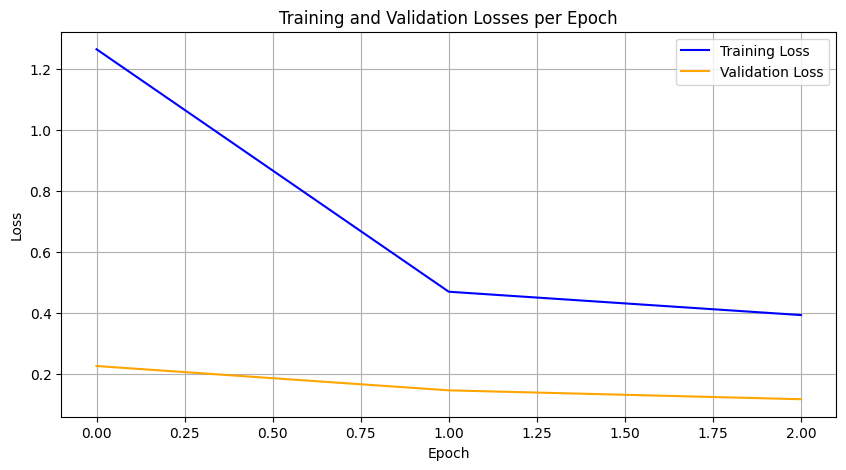

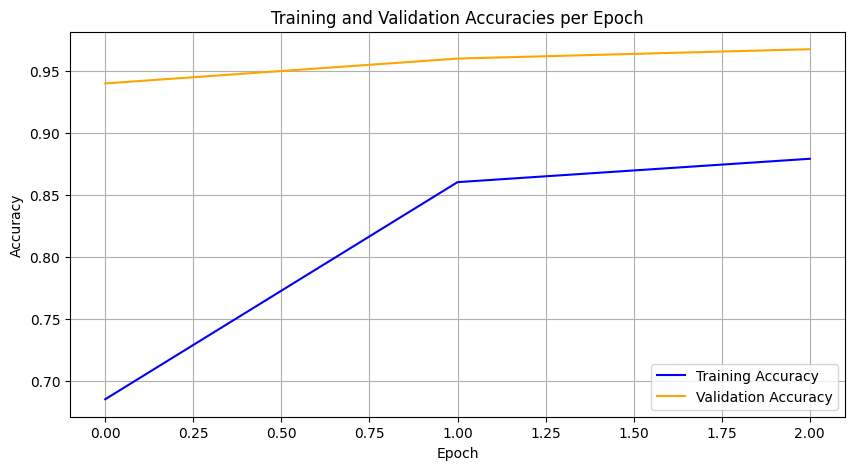

In [ ]:
losses, accuracies = loss_acc
plot_losses_and_accuracies(losses, accuracies)